In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Button, Slider

In [14]:
class Spectral2D:
    def __init__(self, Lx, Ly, number_of_points_x, number_of_points_y, k_0):
        self.Lx = Lx
        self.Ly = Ly
        self.number_of_points_x = number_of_points_x
        self.number_of_points_y = number_of_points_y
        self.k_0 = k_0
        

        self.x_grid = np.linspace(-10*Lx, 10*Lx, number_of_points_x, endpoint=False)
        self.y_grid = np.linspace(-10*Ly, 10*Ly, number_of_points_y, endpoint=False)
        self.kx_grid = 2 * np.pi * np.fft.fftfreq(number_of_points_x, d=20*Lx/number_of_points_x)
        self.ky_grid = 2 * np.pi * np.fft.fftfreq(number_of_points_y, d=20*Ly/number_of_points_y)
        

        self.X, self.Y = np.meshgrid(self.x_grid, self.y_grid)
        self.Kx, self.Ky = np.meshgrid(self.kx_grid, self.ky_grid)
        
       
        self.D = 1j / (2 * k_0)
        self.epsilon = None
        
    def initialize(self, function):
        self.epsilon = function
        
    def step(self, dz):
        if self.epsilon is None:
            raise ValueError("Initialize epsilon before stepping.")
        
        epsilon_hat = np.fft.fft2(self.epsilon)
        
        epsilon_hat *= np.exp(-self.D * (self.Kx**2 + self.Ky**2) * dz)
        
        self.epsilon = np.fft.ifft2(epsilon_hat)
        
        return self.epsilon


In [15]:
def advance(spectral, Z, N):
    dz = Z / N
    epsilon_evolution = []
    for _ in range(N):
        epsilon_evolution.append(spectral.step(dz))
    return np.array(epsilon_evolution)

In [16]:
def exponential(spectral):
    return np.exp(-spectral.X**2/(spectral.Lx/2)**2 - spectral.Y**2/(spectral.Ly/2)**2)

In [17]:
#Example

Lx = 0.1
Ly = 0.1
number_of_points_x = 256
number_of_points_y = 256
k_0 =  2*np.pi/635 *10**9 
Z = 10**5
N = 100 

spectral = Spectral2D(Lx, Ly, number_of_points_x, number_of_points_y, k_0)

spectral.initialize(exponential(spectral))

epsilon_evolution = advance(spectral, Z, N)


In [30]:
# needs to be done.
def analytical_solution(Z, D, amplitude, sigma, x_val):
    return (amplitude/np.sqrt(1+(4*D*Z/sigma**2))*np.exp(-x_val**2/(sigma**2+4*D*Z)))

In [21]:
for i in range(len(spectral.Y)):
    if spectral.Y[i][0]==0:
        print(i)

128


<IPython.core.display.Javascript object>


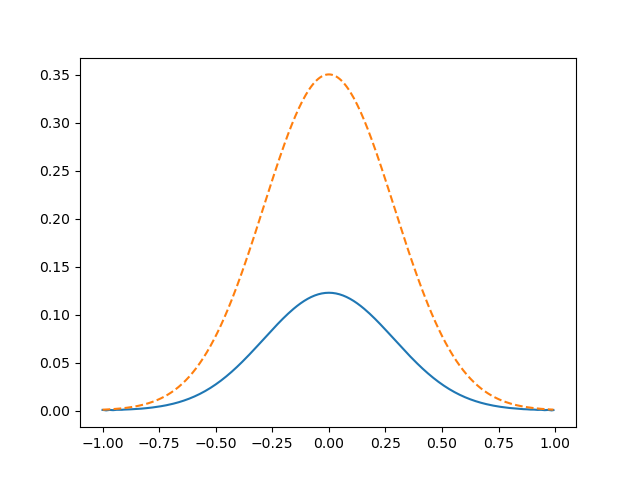

In [38]:
plt.plot(spectral.X[128], np.abs(epsilon_evolution[-1][128]))
plt.plot(spectral.x_grid, np.abs(analytical_solution(Z, spectral.D, 1, Lx/2, spectral.X[128])),'--', label='analytical')

We see that the analytical solution for 1D and the evolution of the wave in 2D are not the same. The task remains to find an analytical solution in 2D, and take a slice of that solution to verify the corectness of the numerical method

<IPython.core.display.Javascript object>


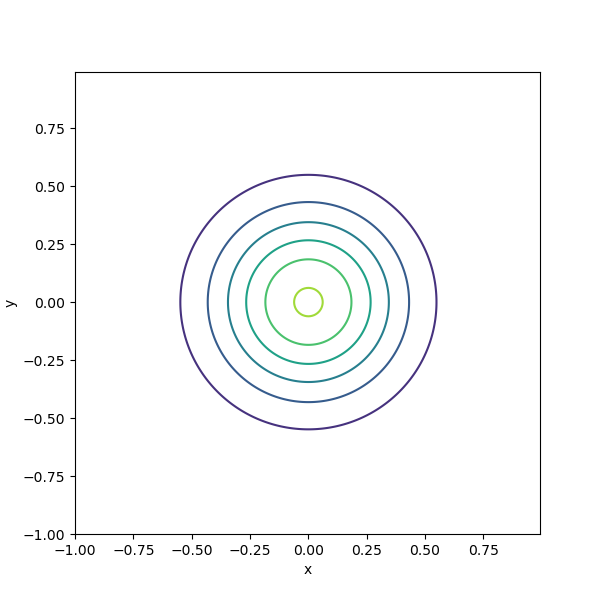

/var/folders/w7/3p3dw0tj57ggm87qfh14d7540000gn/T/ipykernel_33645/3388039470.py:3: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(spectral.X, spectral.Y, abs(epsilon_evolution[-1]), label='final')


In [39]:
plt.figure(figsize=(6, 6))
#plt.contour(spectral.X, spectral.Y, abs(epsilon_evolution[0]), label='initial')
plt.contour(spectral.X, spectral.Y, abs(epsilon_evolution[-1]), label='final')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<IPython.core.display.Javascript object>


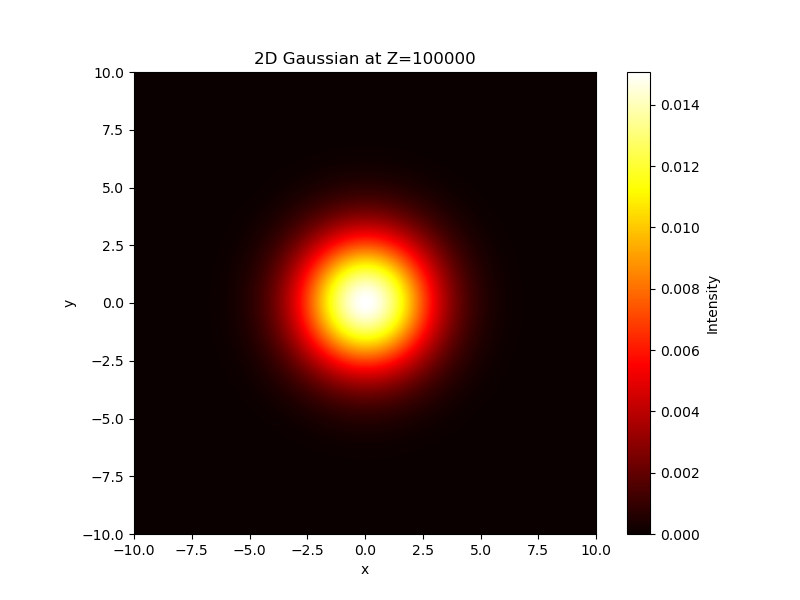

In [15]:
# imshow of the gaussian at z
plt.figure(figsize=(8, 6))
plt.imshow(np.abs(epsilon_evolution[-1])**2, extent=[-10, 10, -10, 10], cmap='hot', origin='lower')
plt.colorbar(label='Intensity')
plt.title('2D Gaussian at Z={}'.format(Z))
plt.xlabel('x')
plt.ylabel('y')
plt.show()